<a href="https://colab.research.google.com/github/Gus-1003/TADS_Projeto_PalmaS/blob/main/PrimeirosTestes/Teste3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teste 3 - Implementação das Features de cor somadas as Features geometricas:

## Importando Bibliotecas:

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.cluster import KMeans

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Lendo Imagem:

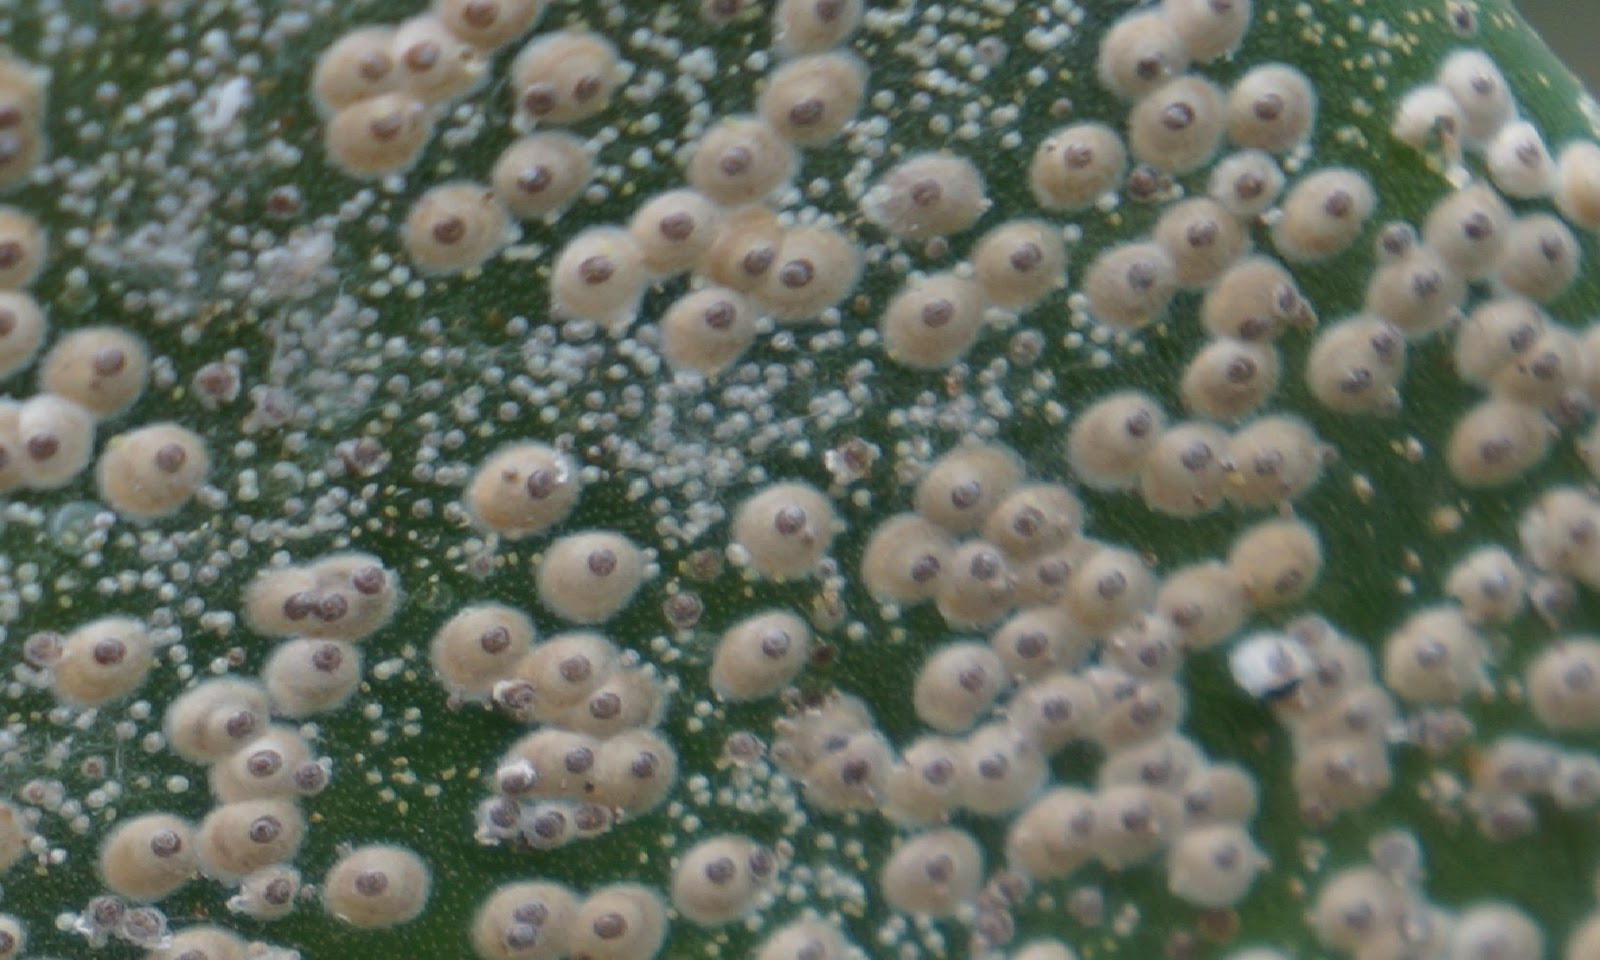

In [114]:
file = '/content/drive/MyDrive/Colab Notebooks/control_img_2.jpeg'
#file = '/content/drive/MyDrive/Colab Notebooks/fig_true_19.jpg'

im = cv.imread(file)
cv2_imshow(im)

## Estudo das dimenssões da imagem:

In [32]:
# Instrução para descobrir o tamanho da dimensão da imagem (Linhas x Colunas)
print('Dim:' + str(im.shape))

Dim:(960, 1600, 3)


# Aplicação de filtros:

In [54]:
median = cv.medianBlur(im, 5)

gauss = cv.GaussianBlur(im, (5,5), 0)

images = np.concatenate((median, gauss), axis=1)

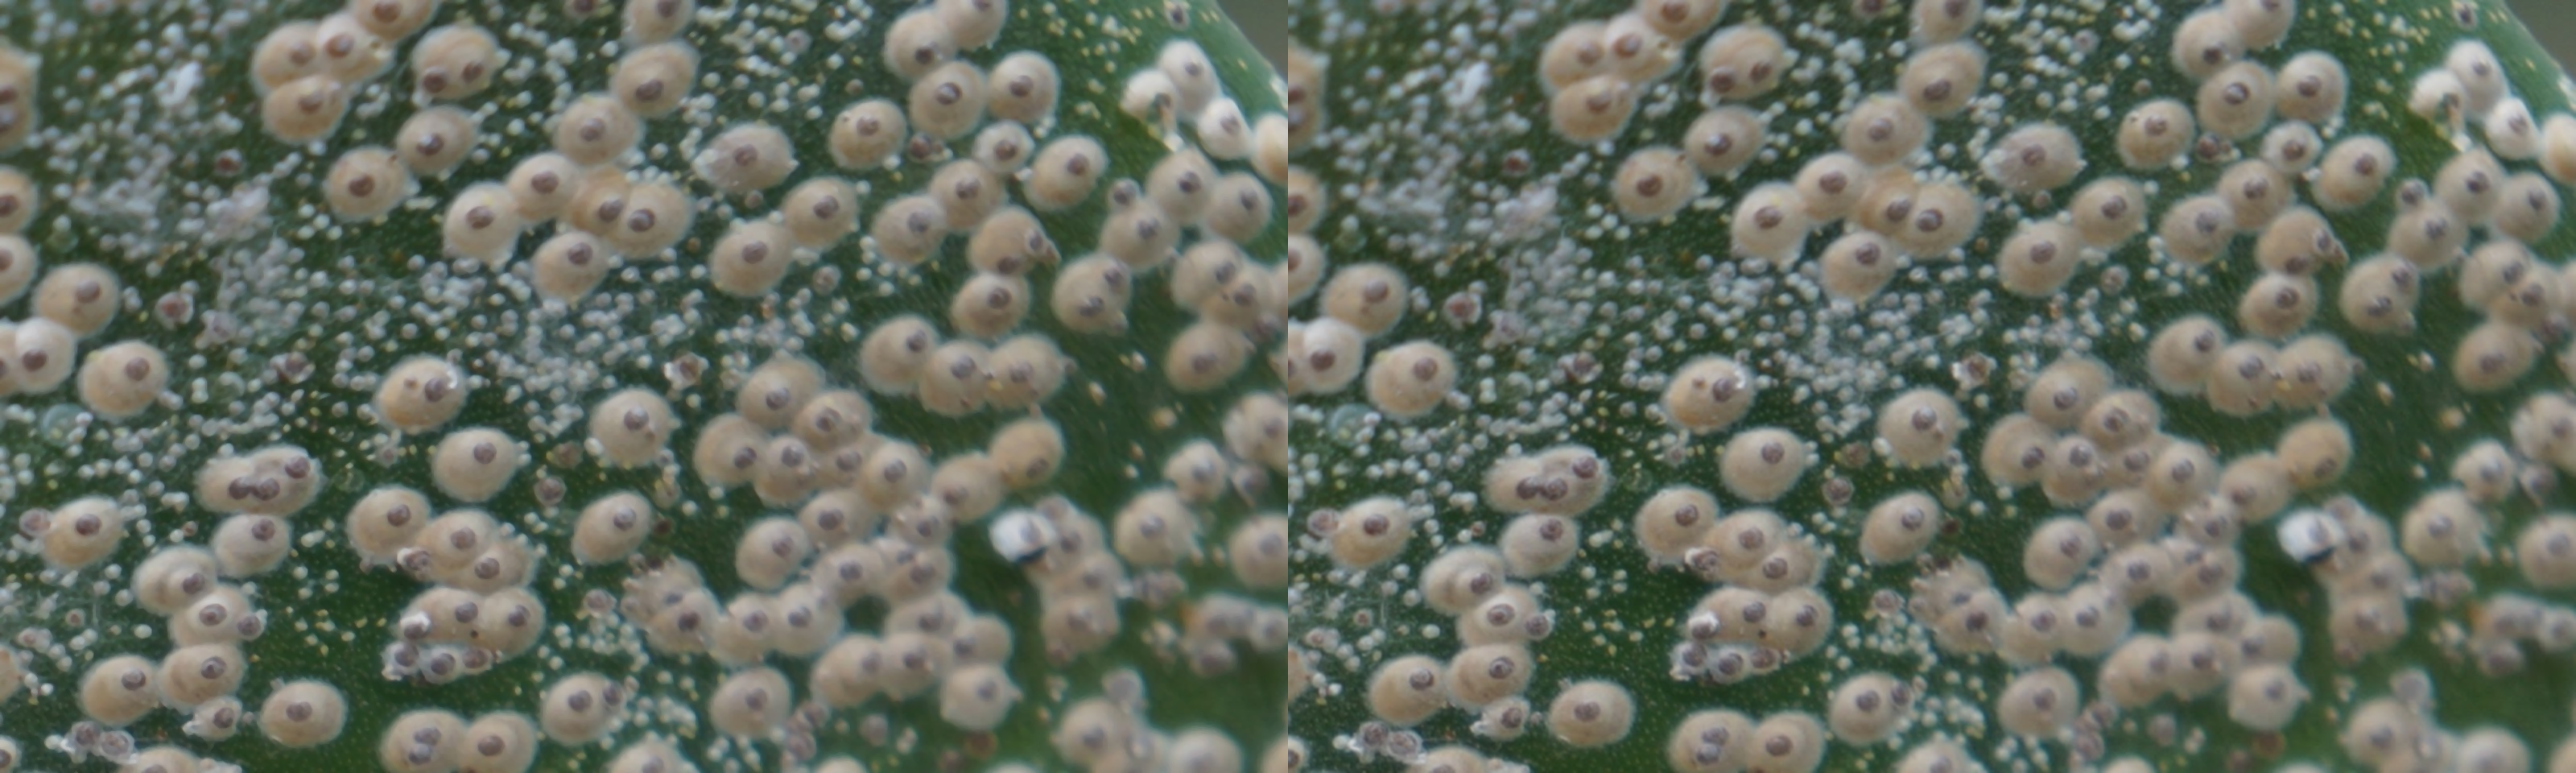

In [55]:
cv2_imshow(images)

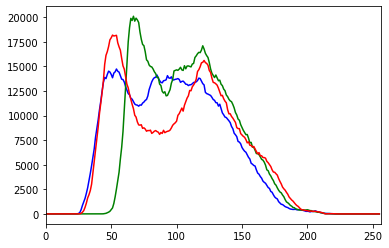

In [71]:
gauss_split_channels = cv.split(gauss)

# numero de bins do histograma
hist_size = 256

# faixa de valores de cada canal
hist_range = (0, 256) #0-255 (8 bits)
accumulate = False

color = ('b','g','r') #h, s, v

for i,col in enumerate(color):

    histr = cv.calcHist(gauss_split_channels,[i],None, [hist_size], hist_range, accumulate=accumulate)

    plt.plot(histr, color = col)

    plt.xlim([0,256])

    
plt.show()

In [73]:
def filtroRGB(src,r,g,b):
    imret = src.copy() #na matriz é BGR
    if r == 0:
        imret[:,:,2] = 0    #elimina o vermelho
    if g == 0:
        imret[:,:,1] = 0   #elimina o verde
    if b == 0:
        imret[:,:,0] = 0    #elimina o azul
    return imret

In [81]:
im_test = filtroRGB(im, 0,0,1)

#cv2_imshow(im_test)

## Canais de cor:

In [85]:
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
#cv2_imshow(gray)

In [86]:
(B, G, R) = cv.split(gauss) 
#cv2_imshow(cv.hconcat([R, G, B]))

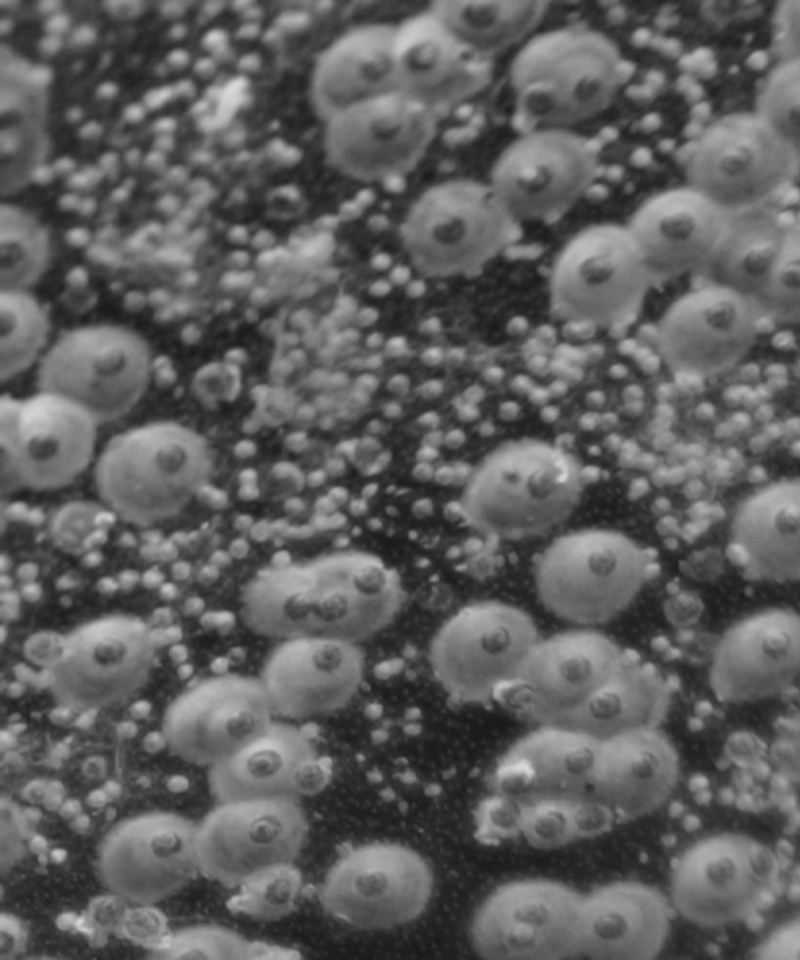

In [84]:
corte = B[0:960, 0:800] # cortando uma parte da imagem
cv2_imshow(corte)

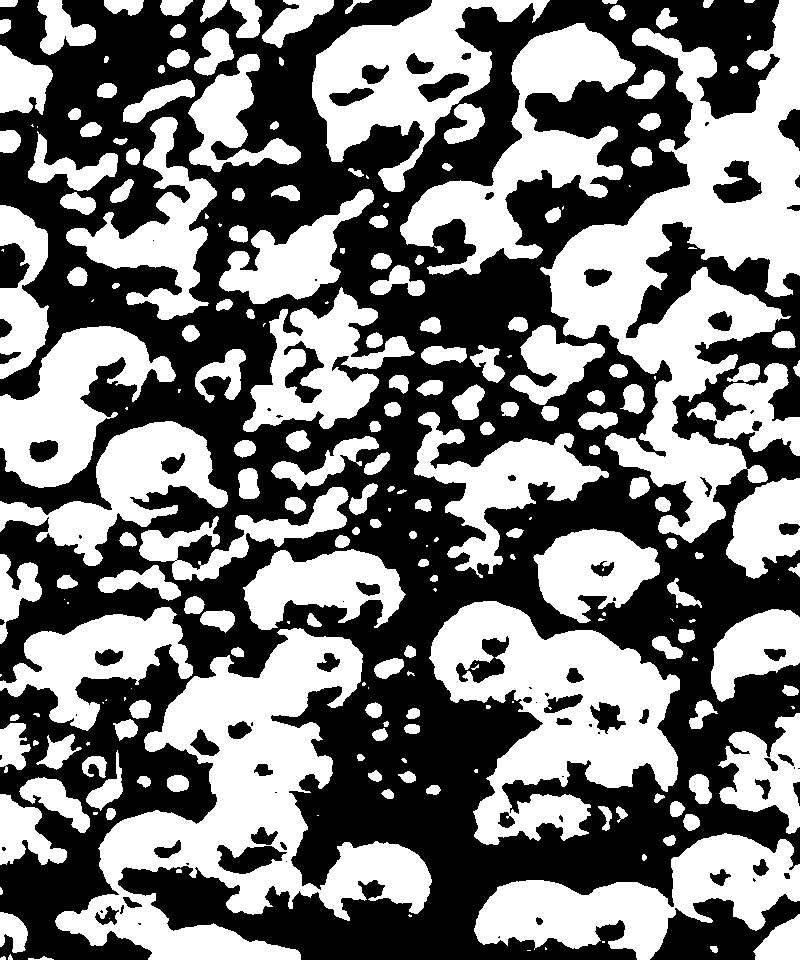

In [89]:
ret, thresh = cv.threshold(corte, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
cv2_imshow(thresh)

In [91]:
def extract_image(im, cnt):
  # np.zeros: Cria uma matriz com determinadas dimensões
  im_blank = np.zeros(im.shape, np.uint8) 
  cv.drawContours(im_blank, [cnt], -1, 255, -1)
  mask = im_blank == 255
  im_filter = im[mask]
  return im_filter

In [92]:
def try_or(im, mask, default=-1):
    try:
        return im[mask]
    except:
        return default

In [95]:
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

cells = [] # Criação da lista de celulas

for cnt in contours:
  M = cv.moments(cnt)
  x, y, width, height = cv.boundingRect(cnt)
  rect = cv.minAreaRect(cnt)
  circle = cv.minEnclosingCircle(cnt)

  r = extract_image(R, cnt)
  g = extract_image(G, cnt)
  b = extract_image(B, cnt)

  cell = {
    #'area': cv2.contourArea(cnt),
    #'area_convex': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)),
    #'area_perc': (cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
    #'area_convex_perc': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
    #'perimeter': cv2.arcLength(cnt,True),
    #'width': width,
    #'height': height,
    #'angle': rect[2],
    #'radius': circle[1],

    'r_mean': np.mean(r) ,
    'r_max': np.max(r),
    'r_min': np.min(r),
    'r_std_dev': np.std(r),

    'g_mean': np.mean(g),
    'g_max': np.max(g),
    'g_min': np.min(g),
    'g_std_dev': np.std(g),

    'b_mean': np.mean(b),
    'b_max': np.max(b),
    'b_min': np.min(b),
    'b_std_dev': np.std(b)
  }

  cells.append(cell)

im = cv.drawContours(im, contours, -1, (73, 113, 232), thickness=2)
#cv2_imshow(im)

# Baseado no do Professor:

In [96]:
ret,th = cv.threshold(im[:,:,0], 0, 255,cv.THRESH_BINARY+cv.THRESH_OTSU)

In [97]:
contours, hierarchy = cv.findContours(th, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

Foram encontrados 574 objetos com seus contornos


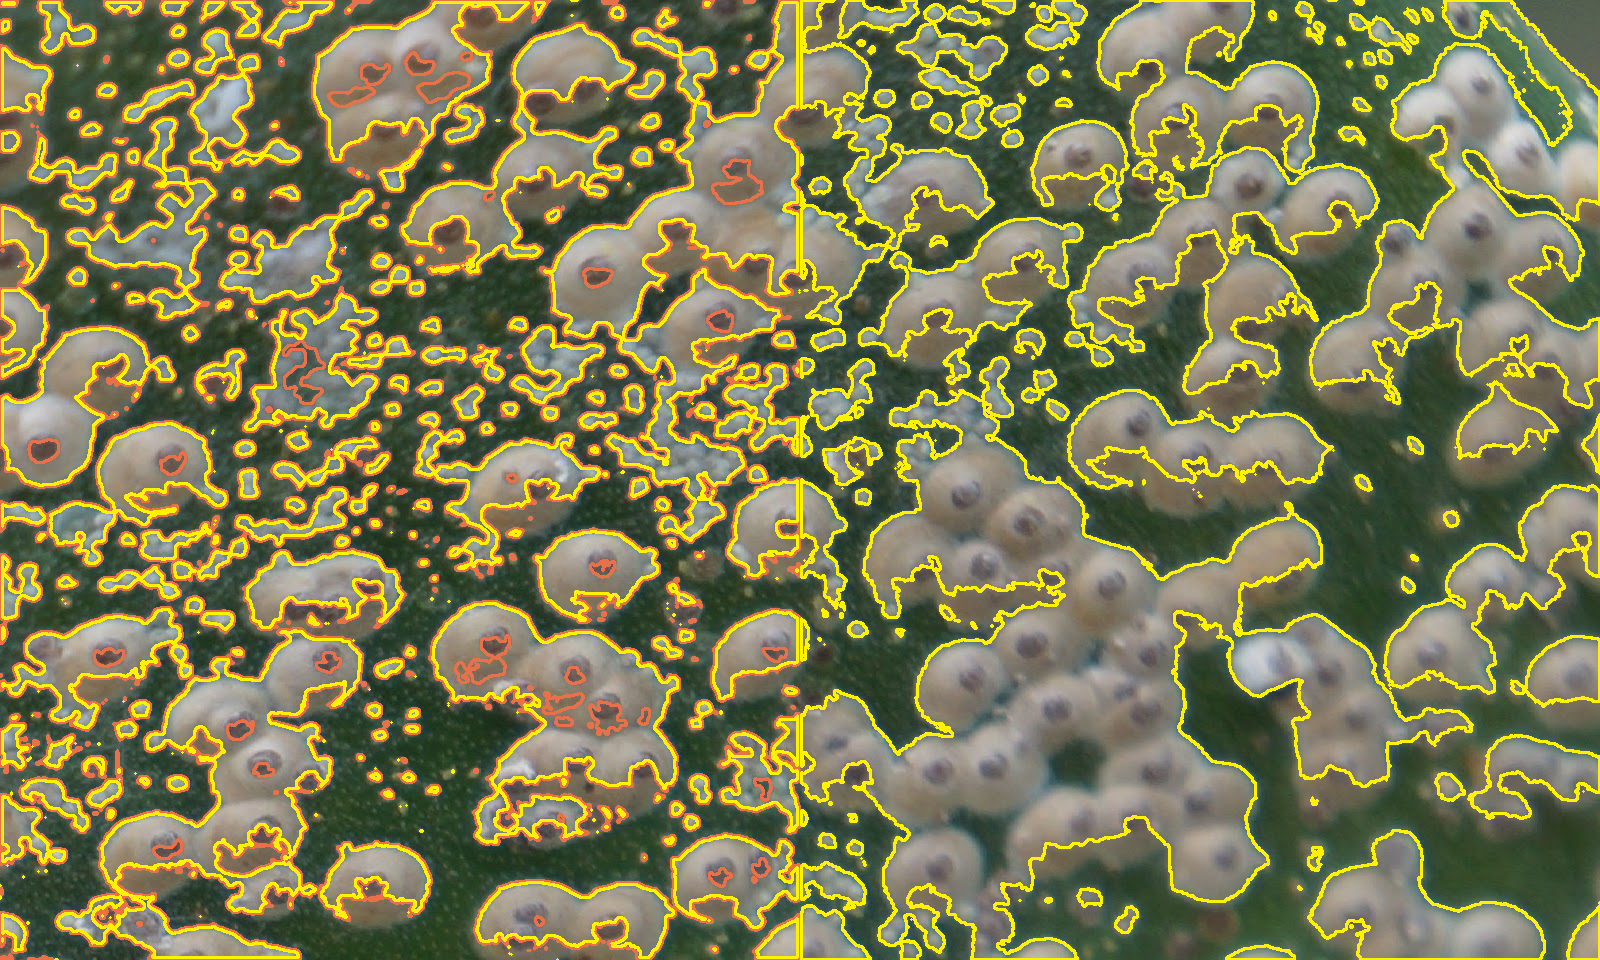

In [98]:
print ('Foram encontrados ' + str(len(contours)) + ' objetos com seus contornos')

cv.drawContours(im, contours, -1, (0,242,255), 2)

cv2_imshow(im)

In [99]:
def extract_image(im, cnt):
  # np.zeros: Cria uma matriz com determinadas dimensões
  im_blank = np.zeros(im.shape, np.uint8) 
  cv.drawContours(im_blank, [cnt], -1, 255, -1)
  mask = im_blank == 255
  im_filter = im[mask]
  return im_filter

In [ ]:
areas = []
perimeters = []
centroids_x = []
centroids_y = []
aspect_ratio = [] #It is the ratio of width to height of bounding rect of the object.
extent = [] #Extent is the ratio of contour area to bounding rectangle area.
solidity = [] #Solidity is the ratio of contour area to its convex hull area.
equivalent_diameter = [] #Equivalent Diameter is the diameter of the circle whose area is same as the contour area.
width = []
height = []
angle = []
radius = []

im_split_channels = cv.split(im)
album = [] 

for c in contours:
    M = cv.moments(c)
    
    areas.append(M['m00'])
    perimeters.append(cv.arcLength(c,True)) #if not convex, False
    
    x,y,w,h = cv.boundingRect(c)
    aspect_ratio.append(float(w)/h)
    width.append(w)
    height.append(h)
    rect = cv.minAreaRect(c)
    circle = cv.minEnclosingCircle(c)
    angle.append(rect[2])
    radius.append(circle[1])
    
    rect_area = w*h
    if rect_area > 0:
        extent.append(M['m00']/rect_area)
    else: 
        extent.append(0)
    
    hull = cv.convexHull(c)
    hull_area = cv.contourArea(hull)
    if hull_area > 0:
        solidity.append(M['m00']/hull_area)
    else:
        solidity.append(0)
    
    equivalent_diameter = np.sqrt(4*M['m00']/np.pi)
    
    if M['m00'] != 0:
        centroids_x.append(M['m10']/M['m00'])
        centroids_y.append(M['m01']/M['m00'])
    else:
        centroids_x.append(0)
        centroids_y.append(0)
        
    r = extract_image(im_split_channels[2], c)
    g = extract_image(im_split_channels[1], c)
    b = extract_image(im_split_channels[0], c)

    features = {
      'area': areas,
      #'area_convex': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)),
      #'area_perc': (cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
      #'area_convex_perc': ((math.pi * (circle[1]**2)) - cv2.contourArea(cnt)) / (math.pi * (circle[1]**2)),
      'perimeter': perimeters,
      'width': width,
      'height': height,
      'angle': angle,
      'radius': radius,

      'r_mean': np.mean(r) ,
      'r_max': np.max(r),
      'r_min': np.min(r),
      'r_std_dev': np.std(r),

      'g_mean': np.mean(g),
      'g_max': np.max(g),
      'g_min': np.min(g),
      'g_std_dev': np.std(g),

      'b_mean': np.mean(b),
      'b_max': np.max(b),
      'b_min': np.min(b),
      'b_std_dev': np.std(b)
    }

    album.append(features)

im = cv.drawContours(im, contours, -1, (73, 113, 232), thickness=2)
cv2_imshow(im)


In [112]:
df = pd.DataFrame(cells)
df.describe()

r_mean       r_max       r_min   r_std_dev      g_mean       g_max  \
count  307.000000  307.000000  307.000000  307.000000  307.000000  307.000000   
mean   112.300499   -2.618893   84.006515   10.070713  118.742176    3.302932   
std     14.192275  109.889701   33.588046    7.601635   14.216996  106.890372   
min     69.078431 -128.000000 -128.000000    0.000000   84.904255 -128.000000   
25%    104.275120 -114.000000   76.500000    3.280268  108.966667 -102.000000   
50%    114.639294  -60.000000   85.000000    8.570539  120.536000  -59.000000   
75%    120.677778  112.500000   98.000000   15.755222  130.212418  114.000000   
max    158.554044  127.000000  127.000000   32.436422  157.724409  127.000000   

            g_min   g_std_dev      b_mean       b_max       b_min   b_std_dev  
count  307.000000  307.000000  307.000000  307.000000  307.000000  307.000000  
mean    94.596091    8.892999  108.706096   19.403909   92.283388    9.388042  
std     33.431518    6.891551   14.400970   99.110388   10.153132    7.982642  
min   -128.000000    0.000000   80.483304 -128.000000   54.000000    0.000000  
25%     93.000000    2.604389   97.122500  -87.000000   96.000000    1.980730  
50%    100.000000    7.689927  103.972222   98.000000   97.000000    7.460388  
75%    106.000000   13.874500  121.911173  104.000000   97.000000   16.702505  
max    125.000000   27.317212  145.994273  127.000000  100.000000   31.533585

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   r_mean     307 non-null    float64
 1   r_max      307 non-null    int8   
 2   r_min      307 non-null    int8   
 3   r_std_dev  307 non-null    float64
 4   g_mean     307 non-null    float64
 5   g_max      307 non-null    int8   
 6   g_min      307 non-null    int8   
 7   g_std_dev  307 non-null    float64
 8   b_mean     307 non-null    float64
 9   b_max      307 non-null    int8   
 10  b_min      307 non-null    int8   
 11  b_std_dev  307 non-null    float64
dtypes: float64(6), int8(6)
memory usage: 16.3 KB
